In [94]:
if 'libraries_imported' not in globals():
    libraries_imported = False

if libraries_imported == False:
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns
    import os
    from datetime import datetime, timedelta
    from datetime import datetime
    from scipy.interpolate import make_interp_spline
    import plotly.graph_objects as go
    from scipy.signal import butter, filtfilt
    import pandas as pd
    import seaborn as sns
    import matplotlib.pyplot as plt
    import numpy as np
    import pandas as pd
    from sklearn.preprocessing import StandardScaler
    import tensorflow as tf
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import Dense
    from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
    from keras_tuner import RandomSearch, HyperModel
    import numpy as np
    import pandas as pd
    from sklearn.preprocessing import StandardScaler
    import tensorflow as tf
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import LSTM, Dense
    from tensorflow.keras.callbacks import EarlyStopping
    from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
    from keras_tuner import RandomSearch, HyperModel
    from tensorflow.keras.layers import Input
    import sys
    from sklearn.model_selection import train_test_split
    from sklearn.ensemble import RandomForestRegressor
    import numpy as np
    import matplotlib.pyplot as plt
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    from sklearn.preprocessing import RobustScaler
    import tensorflow as tf
    from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
    from sklearn.preprocessing import RobustScaler
    import joblib
    from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
    from sklearn.utils.class_weight import compute_class_weight
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    import joblib
    import tensorflow as tf
    from sklearn.preprocessing import RobustScaler
    from sklearn.model_selection import train_test_split
    from sklearn.utils.class_weight import compute_class_weight
    from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
    import numpy as np
    import pandas as pd
    import joblib
    import tensorflow as tf
    from sklearn.model_selection import train_test_split
    from imblearn.over_sampling import SMOTE




    # # Display the first few rows
    # import ace_tools as tools  # Importing display tool

In [95]:

# Load and clean SaniWASE dataset
saniWASE_df = pd.read_csv("datasets/SaniWASE_Data_Cleaned_t1.csv")
saniWASE_df["date"] = pd.to_datetime(saniWASE_df["datetime"])
saniWASE_df.drop(columns=["index", "datetime", "f/m_ratio", "fos", "tac"], inplace=True)
saniWASE_df = saniWASE_df.drop_duplicates()
# Load and clean Cook dataset
cook_df = pd.read_csv("datasets/Cook_Data_Cleaned_t1.csv")
cook_df['date'] = pd.to_datetime(cook_df['date'])
cook_df = cook_df.groupby('date').mean()
cook_df = cook_df.drop_duplicates()
cook_df.reset_index(inplace=True)





cook_df.drop(columns=["Unnamed: 0"], inplace=True)
cook_df["methane_percentage"] *= 100

# Ensure consistent column order, keeping "date" first
column_order = ["date"] + [col for col in saniWASE_df.columns if col != "date"]
saniWASE_df = saniWASE_df[column_order]
cook_df = cook_df[column_order]




#Only keep live data inputs 

saniWASE_df.drop(columns=["h2s_ppm", "t1_cod", "t1_olr", "fostac"], inplace=True)
cook_df.drop(columns=["h2s_ppm", "t1_cod", "t1_olr", "fostac"], inplace=True)


display(saniWASE_df.head())
display(cook_df.head())


saniWASE_df_interpolated = saniWASE_df.interpolate(method = 'ffill')
cook_df_interpolated = cook_df.interpolate(method = 'ffill')

cook_df_interpolated = cook_df_interpolated.dropna()


/tmp/ipykernel_17494/160896863.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  saniWASE_df["date"] = pd.to_datetime(saniWASE_df["datetime"])


,date,eq_ph,eq_cod,feed_vol,t1_ph,current,temp,methane_percentage,hrt,biogas_vol
0,2022-07-06,5.5,14694,144,7.1,1652,36.8,65.1,25.0,1232.0
1,2022-08-06,5.3,15633,144,7.2,1652,36.8,68.0,25.0,1019.0
2,2022-09-06,5.2,11950,144,7.3,1652,36.8,70.9,25.0,1005.0
3,2022-10-06,5.2,14399,192,7.3,1652,34.8,65.7,19.0,892.0
4,2022-11-06,NaN,14399,192,NaN,1652,NaN,65.7,19.0,1100.0


,date,eq_ph,eq_cod,feed_vol,t1_ph,current,temp,methane_percentage,hrt,biogas_vol
0,2024-11-04,3.7,39900.0,60.0,7.0,497.422,35.770769,66.66,15.0,300.0
1,2024-11-05,3.7,31400.0,60.0,7.0,545.210,36.464368,62.71,15.0,690.0
2,2024-11-06,3.7,26700.0,60.0,7.0,519.733,36.996667,64.16,15.0,660.0
3,2024-11-07,3.6,27500.0,60.0,7.0,506.521,35.317529,61.32,15.0,770.0
4,2024-11-08,3.7,32900.0,60.0,7.0,484.783,35.906047,60.61,15.0,740.0


/tmp/ipykernel_17494/160896863.py:38: FutureWarning: DataFrame.interpolate with method=ffill is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  saniWASE_df_interpolated = saniWASE_df.interpolate(method = 'ffill')
/tmp/ipykernel_17494/160896863.py:39: FutureWarning: DataFrame.interpolate with method=ffill is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  cook_df_interpolated = cook_df.interpolate(method = 'ffill')


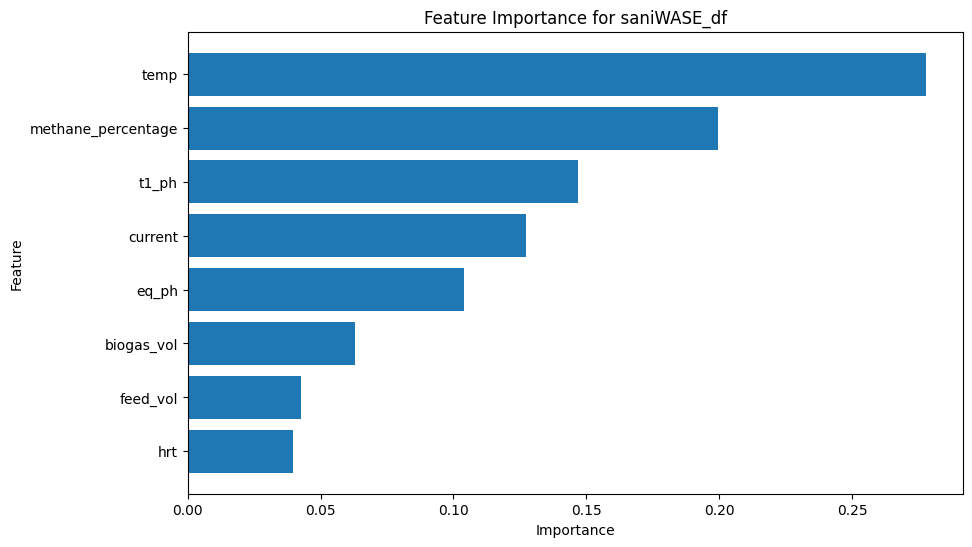

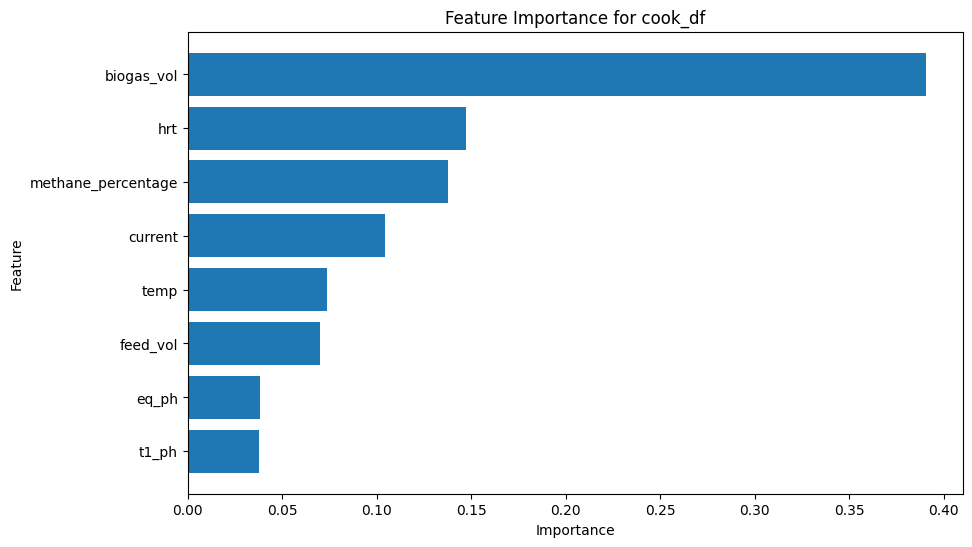

In [96]:
# Import necessary libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

# Function to perform feature importance analysis
def feature_importance_analysis(df, target_column, drop_columns, title):
    # Prepare the data
    X = df.drop(drop_columns, axis=1)
    y = df[target_column]

    # Splitting the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Modeling
    model = RandomForestRegressor(n_estimators=300, random_state=42)
    model.fit(X_train, y_train)

    # Feature importance extraction
    importances = model.feature_importances_
    features = X_train.columns

    # Sorting the features by importance
    indices = np.argsort(importances)
    sorted_features = [features[i] for i in indices]
    sorted_importances = importances[indices]

    # Create the plot
    plt.figure(figsize=(10, 6))
    plt.barh(sorted_features, sorted_importances)
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.title(title)
    plt.show()

# Feature importance for saniWASE_df
feature_importance_analysis(
    df= saniWASE_df_interpolated,
    target_column='eq_cod',
    drop_columns=['eq_cod', 'date'],
    title='Feature Importance for saniWASE_df'
)

# Feature importance for cook_df
feature_importance_analysis(
    df= cook_df_interpolated,
    target_column='eq_cod',
    drop_columns=['eq_cod', 'date'],
    title='Feature Importance for cook_df'
)



# Feature Importance Comparison

## Common Observations
- **`t1_ph`** is the most significant feature in both datasets (importance > 0.4).
- **`biogas_vol`** consistently ranks among the top three features.

## Notable Differences

| Feature               | saniWASE_df Importance | cook_df Importance |
|-----------------------|------------------------|--------------------|
| **`methane_percentage`** | High (2nd)             | Low (6th)          |
| **`eq_ph`**              | Moderate (5th)         | High (2nd)         |
| **`feed_vol`**           | Low (8th)              | Moderate (4th)     |
| **`current`**            | Moderate (4th)         | Low (5th)          |
| **`temp`**               | Low (slightly higher)  | Very Low           |
| **`hrt`**                | Consistently low       | Lowest             |

## Overall Insights
- **`t1_ph`** consistently emerges as the most influential predictor, indicating pH's critical role across both scenarios.
- Secondary feature importance highlights dataset-specific dynamics:
  - **saniWASE_df** outcomes depend significantly on methane percentage and biogas volume.
  - **cook_df** outcomes rely heavily on equilibrium pH (`eq_ph`) and biogas volume.


In [97]:
scaler = joblib.load('model_params/robust_scaler.pkl')
df_interpolated  = cook_df_interpolated[['eq_cod', 'date', 't1_ph', 'biogas_vol', 'methane_percentage', 'current', 'temp']]


window_size = 3
df_interpolated['t1_ph_ma'] = df_interpolated['t1_ph'].rolling(window=window_size, min_periods=1).mean()
df_interpolated['biogas_vol_ma'] = df_interpolated['biogas_vol'].rolling(window=window_size, min_periods=1).mean()
df_interpolated['methane_percentage_ma'] = df_interpolated['methane_percentage'].rolling(window=window_size, min_periods=1).mean()
df_interpolated['current_ma'] = df_interpolated['current'].rolling(window=window_size, min_periods=1).mean()
df_interpolated['temp_ma'] = df_interpolated['temp'].rolling(window=window_size, min_periods=1).mean()

# Display the DataFrame to verify the moving averages
print(df_interpolated.head())
df_interpolated = df_interpolated.interpolate(method = 'ffill')
df_interpolated = df_interpolated.interpolate(method = 'bfill')

    eq_cod       date  t1_ph  biogas_vol  methane_percentage  current  \
0  39900.0 2024-11-04    7.0       300.0               66.66  497.422   
1  31400.0 2024-11-05    7.0       690.0               62.71  545.210   
2  26700.0 2024-11-06    7.0       660.0               64.16  519.733   
3  27500.0 2024-11-07    7.0       770.0               61.32  506.521   
4  32900.0 2024-11-08    7.0       740.0               60.61  484.783   

        temp  t1_ph_ma  biogas_vol_ma  methane_percentage_ma  current_ma  \
0  35.770769       7.0     300.000000                 66.660  497.422000   
1  36.464368       7.0     495.000000                 64.685  521.316000   
2  36.996667       7.0     550.000000                 64.510  520.788333   
3  35.317529       7.0     706.666667                 62.730  523.821333   
4  35.906047       7.0     723.333333                 62.030  503.679000   

     temp_ma  
0  35.770769  
1  36.117569  
2  36.410601  
3  36.259521  
4  36.073414  


/tmp/ipykernel_17494/3930926975.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_interpolated['t1_ph_ma'] = df_interpolated['t1_ph'].rolling(window=window_size, min_periods=1).mean()
/tmp/ipykernel_17494/3930926975.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_interpolated['biogas_vol_ma'] = df_interpolated['biogas_vol'].rolling(window=window_size, min_periods=1).mean()
/tmp/ipykernel_17494/3930926975.py:14: FutureWarning: DataFrame.interpolate with method=ffill is deprecated and will raise i

In [98]:
# print(df_interpolated.info)


print(df_interpolated.describe())

             eq_cod                 date      t1_ph   biogas_vol  \
count     50.000000                   50  50.000000    50.000000   
mean   43120.000000  2024-12-25 08:09:36   6.884000  1259.000000   
min    25500.000000  2024-11-04 00:00:00   6.500000   220.000000   
25%    30900.000000  2024-11-23 12:00:00   6.800000   762.500000   
50%    39300.000000  2024-12-17 12:00:00   6.900000  1170.000000   
75%    50450.000000  2025-01-26 06:00:00   7.000000  1687.500000   
max    84200.000000  2025-03-13 00:00:00   7.100000  2660.000000   
std    14721.440701                  NaN   0.140495   576.542297   

       methane_percentage     current       temp   t1_ph_ma  biogas_vol_ma  \
count           50.000000   50.000000  50.000000  50.000000      50.000000   
mean            61.205020  475.056780  34.105849   6.885333    1223.033333   
min             50.040000  322.632000  29.343600   6.633333     300.000000   
25%             59.185000  430.152750  32.951310   6.833333     880.833333 

In [99]:
import numpy as np
import pandas as pd
import os
import joblib
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_recall_fscore_support, confusion_matrix, ConfusionMatrixDisplay
from imblearn.over_sampling import SMOTE
from collections import Counter

# Load the scaler previously saved and exclude the target variable in its expected features
scaler_path = 'model_params/robust_scaler.pkl'
scaler = joblib.load(scaler_path)
expected_features = [feat for feat in scaler.feature_names_in_ if feat != 'eq_cod']

# Load pre-trained models (from previous cross-validation)
model_dir = 'model_params'
model_files = [f for f in os.listdir(model_dir) if f.startswith('random_forest_model_fold')]
pretrained_models = []
for model_file in model_files:
    model_path = os.path.join(model_dir, model_file)
    pretrained_model = joblib.load(model_path)
    pretrained_models.append((model_file, pretrained_model))

# print(f"Loaded {len(pretrained_models)} pre-trained models.")

# Assume df_interpolated is defined here, ensure to define or load it appropriately
df = df_interpolated.copy()

# Target and bins setup
target = 'eq_cod'
bins = [0, 50000, 90000, np.inf]
labels = [f"{bin_start}-{bin_end}" for bin_start, bin_end in zip(bins[:-1], bins[1:])]

# Data preprocessing
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)
df.dropna(subset=[target], inplace=True)

df['target_category'] = pd.cut(df[target], bins=bins, labels=labels, include_lowest=True)
df.dropna(subset=['target_category'], inplace=True)
df['target_category'] = df['target_category'].cat.codes  # Convert to numerical categories

X = df.drop(columns=[target, 'target_category'])  # Ensure target is not in X
y = df['target_category']

# Ensure X contains only expected features from the pre-saved scaler
X = X[[col for col in expected_features if col in X.columns]]

# Check if all expected features are present
if not all(feature in X.columns for feature in expected_features):
    missing_features = set(expected_features) - set(X.columns)
    raise ValueError(f"Missing features in X: {missing_features}")




# Split data for fine-tuning
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=47, stratify=y)
display(X_train.head())
# Apply the saved scaler transformation
X_train_scaled = scaler.transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Apply SMOTE for class balancing
smote = SMOTE(random_state=47)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

# Fine-Tune Pre-Trained Models
for fold, (model_name, rf_model) in enumerate(pretrained_models):
    print(f"\nFine-tuning {model_name} on new data...")
    rf_model.fit(X_train_smote, y_train_smote)  # Continue training
    # Save fine-tuned model
    tuned_model_path = os.path.join(model_dir, f'fine_tuned_{model_name}')
    joblib.dump(rf_model, tuned_model_path)

# Create an ensemble of fine-tuned models
ensemble_model = VotingClassifier(estimators=[(name, model) for name, model in pretrained_models], voting='soft')
ensemble_model.fit(X_train_smote, y_train_smote)

# Save the ensemble model
ensemble_model_path = os.path.join(model_dir, 'random_forest_ensemble.pkl')
joblib.dump(ensemble_model, ensemble_model_path)

# Make predictions using the ensemble model
y_pred = ensemble_model.predict(X_val_scaled)

# Generate classification report and confusion matrix
accuracy = accuracy_score(y_val, y_pred)
precision, recall, f1_score, _ = precision_recall_fscore_support(y_val, y_pred, average='macro')
cm = confusion_matrix(y_val, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Fine-Tuned Model')
plt.show()

# Save results
results_summary = {
    'Accuracy': accuracy,
    'Precision (Macro)': precision,
    'Recall (Macro)': recall,
    'F1-score (Macro)': f1_score,
    'Class distribution': Counter(y_val),
}
results_df = pd.DataFrame([results_summary])
print("\nPerformance Summary:\n")
print(results_df)
results_df.to_csv('model_params/fine_tuned_results.csv', index=False)


,t1_ph,biogas_vol,methane_percentage,current,temp,t1_ph_ma,biogas_vol_ma,methane_percentage_ma,current_ma,temp_ma
date,,,,,,,,,,
2024-12-02,7.0,1910.0,61.55,497.763,35.348471,6.933333,1720.000000,61.116667,450.543000,34.580641
2025-01-14,7.0,670.0,60.67,367.510,29.647386,7.000000,666.666667,62.720000,386.553000,31.821748
2024-11-11,6.9,760.0,59.10,440.825,35.744819,6.966667,756.666667,60.343333,477.376333,35.656132
2024-11-04,7.0,300.0,66.66,497.422,35.770769,7.000000,300.000000,66.660000,497.422000,35.770769
2024-12-10,6.8,830.0,64.65,430.303,35.167093,6.866667,910.000000,63.563333,472.509333,35.481325


ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- eq_cod


In [ ]:
expected_features = [feat for feat in scaler.feature_names_in_ if feat != 'eq_cod']
print(expected_features)

X = df.select_dtypes(include=[np.number])  # or however you originally selected features
if 'eq_cod' in X.columns:
    X = X.drop(columns=['eq_cod'])


['t1_ph', 'biogas_vol', 'methane_percentage', 'current', 'temp', 't1_ph_ma', 'biogas_vol_ma', 'methane_percentage_ma', 'current_ma', 'temp_ma']
